#### Project Name: Customer Behaviour Prediction using Web Usage Analysis

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv("customer-buying-intention.csv")

In [213]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,BuyingProbability
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,Nov,2,2,3,11,Returning_Visitor,False,False


In [214]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
BuyingProbability          0
dtype: int64

In [215]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
BuyingProbability             2
dtype: int64

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### Transforming categorical and Boolean data to numerical

In [217]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Month"])
le.classes_
df["Month"]=le.transform(df["Month"])

In [218]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["VisitorType"])
le.classes_
df["VisitorType"]=le.transform(df["VisitorType"])

In [219]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Weekend"])
le.classes_
df["Weekend"]=le.transform(df["Weekend"])

In [220]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["BuyingProbability"])
le.classes_
df["BuyingProbability"]=le.transform(df["BuyingProbability"])

In [221]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,BuyingProbability
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,2,0,0
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,2,0,0
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,2,0,0
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,2,0,0
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.00,0,0.00,53,1783.79,0.01,0.03,12.24,0.00,1,4,6,1,1,2,1,0
12326,0,0.00,0,0.00,5,465.75,0.00,0.02,0.00,0.00,7,3,2,1,8,2,1,0
12327,0,0.00,0,0.00,6,184.25,0.08,0.09,0.00,0.00,7,3,2,1,13,2,1,0
12328,4,75.00,0,0.00,15,346.00,0.00,0.02,0.00,0.00,7,2,2,3,11,2,0,0


##### Feature Selection

Feature: 0  Score: -6.488240064883577e-05
Feature: 1  Score: -6.488240064879136e-05
Feature: 2  Score: -4.866180048661573e-05
Feature: 3  Score: -3.244120032439568e-05
Feature: 4  Score: -1.622060016219784e-05
Feature: 5  Score: 0.0
Feature: 6  Score: 0.0
Feature: 7  Score: 0.0
Feature: 8  Score: 4.866180048663793e-05
Feature: 9  Score: 8.11030008109892e-05
Feature: 10  Score: 0.0003081914030819144
Feature: 11  Score: 0.00043795620437958593
Feature: 12  Score: 0.008726682887266857
Feature: 13  Score: 0.009391727493917257
Feature: 14  Score: 0.022757502027575028
Feature: 15  Score: 0.034030819140308186
Feature: 16  Score: 0.08248175182481751


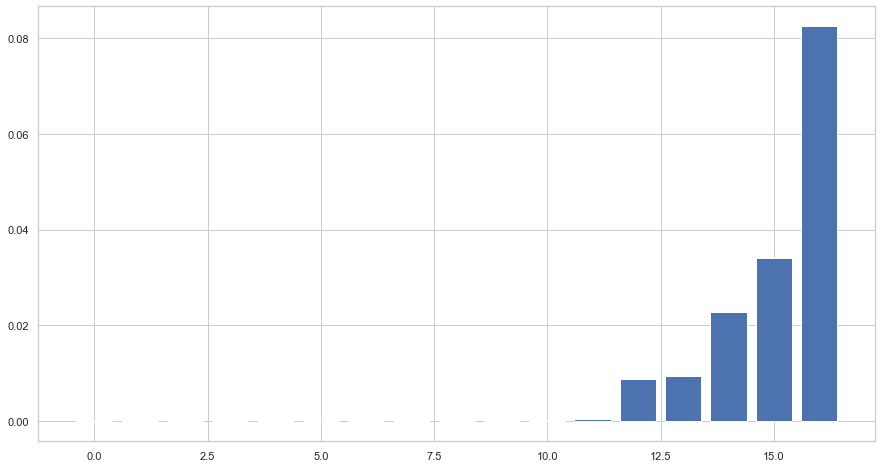

In [222]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
y=df[["BuyingProbability"]]
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

<AxesSubplot:>

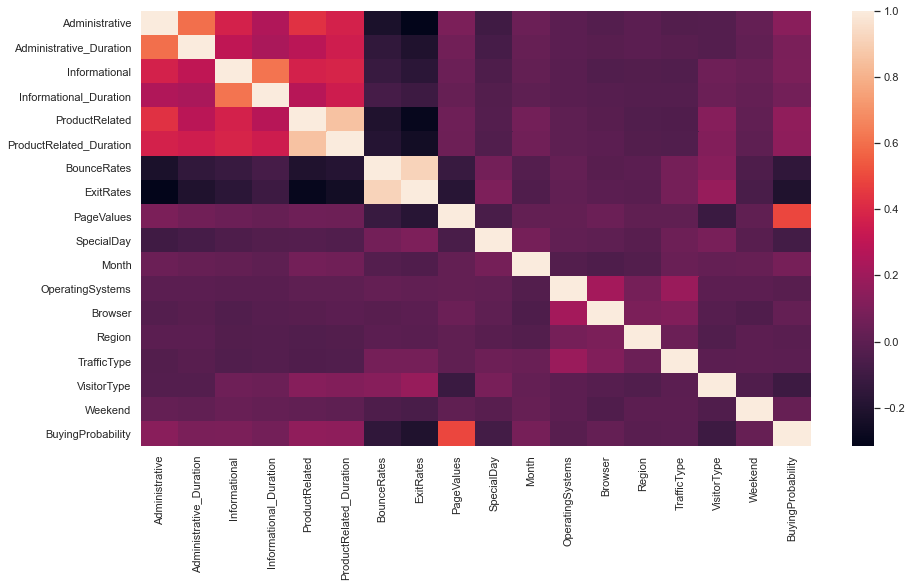

In [223]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr())

##### Splitting the data

In [224]:
x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
y=df[["BuyingProbability"]]
#removed - BounceRates, ExitRates
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

##### Models best suited using LazyPredictor

In [225]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [226]:
# Defining parameters for lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


In [227]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,1.00,1.00,1.67
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.12
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.06
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.63
LabelPropagation,1.00,0.99,0.99,1.00,7.72
LabelSpreading,1.00,0.99,0.99,1.00,9.38
BaggingClassifier,0.99,0.97,0.97,0.99,0.50
XGBClassifier,0.98,0.95,0.95,0.98,0.56
LGBMClassifier,0.96,0.90,0.90,0.96,0.31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'RandomForestClassifier'),
  Text(1, 0, 'DecisionTreeClassifier'),
  Text(2, 0, 'ExtraTreeClassifier'),
  Text(3, 0, 'ExtraTreesClassifier'),
  Text(4, 0, 'LabelPropagation'),
  Text(5, 0, 'LabelSpreading'),
  Text(6, 0, 'BaggingClassifier'),
  Text(7, 0, 'XGBClassifier'),
  Text(8, 0, 'LGBMClassifier'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'NearestCentroid'),
  Text(11, 0, 'SVC'),
  Text(12, 0, 'KNeighborsClassifier'),
  Text(13, 0, 'SGDClassifier'),
  Text(14, 0, 'BernoulliNB'),
  Text(15, 0, 'GaussianNB'),
  Text(16, 0, 'QuadraticDiscriminantAnalysis'),
  Text(17, 0, 'CalibratedClassifierCV'),
  Text(18, 0, 'LogisticRegression'),
  Text(19, 0, 'LinearDiscriminantAnalysis'),
  Text(20, 0, 'LinearSVC'),
  Text(21, 0, 'PassiveAggressiveClassifier'),
  Text(22, 0, 'RidgeClassifier'),
  Text(23, 0, 'RidgeClassifierCV'),
  Text(24, 0, 'Percept

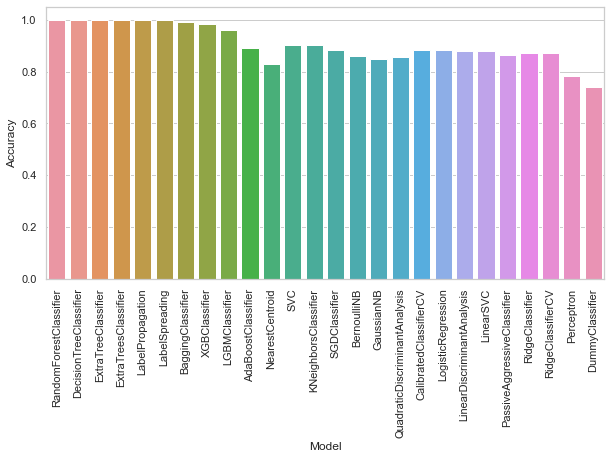

In [228]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

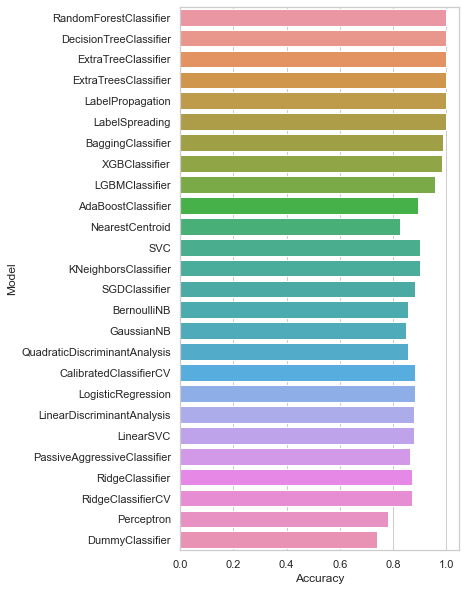

In [229]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)

##### Testing each model manually:

##### Gradiant Boosting

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
#Train a Decision tree classifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=23)
dtree.fit(x_train,y_train)
dt_pred = dtree.predict(x_test)
 
dt_acc = round(accuracy_score(y_test,dt_pred),3)
print(f"Decision Tree Classifier Accuracy Score: ", dt_acc)

Decision Tree Classifier Accuracy Score:  0.878


In [231]:
from sklearn.ensemble import GradientBoostingClassifier
 
#Gradient Boost Model using Decision Tree Classifier
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5)
gb.fit(x_train,np.ravel(y_train))
gb_pred = gb.predict(x_test)
 
gb_acc = round(accuracy_score(y_test,gb_pred),3)
m1 = gb_acc
print(f"Decision Tree Gradient Boost Model Accuracy Score: ", gb_acc)

Decision Tree Gradient Boost Model Accuracy Score:  0.88


##### Ensemble Model - Boosting using AdaBoost

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
#Train a Decision tree classifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=23)
dtree.fit(x_train,y_train)
dt_pred = dtree.predict(x_test)
 
dt_acc = round(accuracy_score(y_test,dt_pred),3)
print(f"Decision Tree Classifier Accuracy Score: ", dt_acc*100)

Decision Tree Classifier Accuracy Score:  87.8


In [233]:
from sklearn.ensemble import AdaBoostClassifier
 
#AdaBoost Model using Decision Tree Classifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.6)
ada.fit(x_train,np.ravel(y_train))
ada_pred = ada.predict(x_test)
 
ada_acc = round(accuracy_score(y_test,ada_pred),3)
m2 = ada_acc
print(f"Decision Tree AdaBoost Model Accuracy Score: ", ada_acc)

Decision Tree AdaBoost Model Accuracy Score:  0.898


##### Ensemble Model - Bagging

In [234]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=23)
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=dtree, n_estimators=5, max_samples=50, bootstrap=True)

In [235]:
bagging.fit(x_train, np.ravel(y_train))
res = bagging.score(x_test, y_test)
m3 = res
#print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: ",res)

Test score:  0.8805082454717491


##### RandomForest Classifier

In [236]:
print(len(y_test))
print(len(y_train))

3699
8631


In [237]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,np.ravel(y_train))
y_pred=rfc.predict(x_test)

In [238]:
from sklearn import metrics
m4 = metrics.accuracy_score(y_pred,y_test)
print(metrics.accuracy_score(y_pred,y_test))

0.8997026223303596


In [ ]:
#dropping a variable
df.drop('ExitRates', axis=1, inplace=True)

In [ ]:
df.info()

In [239]:
x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
y=df[["BuyingProbability"]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_pred,y_test))

0.903757772370911


In [240]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[3001  104]
 [ 252  342]]


##### DecisionTree Classifier

In [242]:
x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
y=df[["BuyingProbability"]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
m5 = metrics.accuracy_score(y_test,y_pred)
print("Accuracy is ", m5)

Accuracy is  0.8896999188969992


##### Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predicted= model.predict(x_test)
print("Predicted Value:", predicted)

[0 0 0 ... 0 0 0]
Predicted Value: [0 0 0 ... 0 0 0]


In [154]:
print("Accuracy:",metrics.accuracy_score(y_test,predicted))
m6 = metrics.accuracy_score(y_test,predicted)

Accuracy: 0.8523925385239254


##### KFold

In [135]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 6165  6166  6167 ... 12327 12328 12329] TEST: [   0    1    2 ... 6162 6163 6164]
TRAIN: [   0    1    2 ... 6162 6163 6164] TEST: [ 6165  6166  6167 ... 12327 12328 12329]


In [156]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train,y_train, scoring='accuracy', cv=10)
print(scores)
m7 = scores.mean()
print (scores.mean())

[0.84599797 0.83485309 0.83586626 0.85410334 0.8356998  0.84584178
 0.86511156 0.85598377 0.87423935 0.86713996]
0.8514836895873537


##### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [138]:
y_pred = classifier.predict(x_test)

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2055   50]
 [ 245  116]]


In [157]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
m8 = accuracy_score(y_test, y_pred)
print(m8)

Accuracy :  0.8957826439578265
0.8957826439578265


##### Comparing accuracy of all models

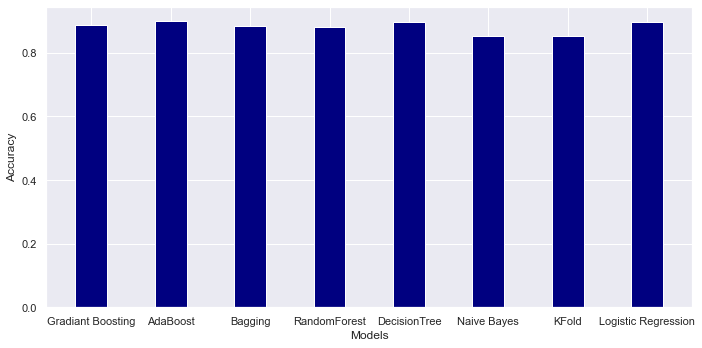

In [168]:
data = {'Gradiant Boosting': m1, 'AdaBoost': m2, 'Bagging': m3, 'RandomForest': m4, 'DecisionTree': m5, 'Naive Bayes': m6, 'KFold': m7, 'Logistic Regression': m8}
x_axis_models = list(data.keys())
y_axis_accuracy = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis_models, y_axis_accuracy, color='navy', width=0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()